In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings

# ML Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Models
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# KNN
from sklearn.neighbors import KNeighborsClassifier

# xgboost
# pip install xgboost
from xgboost import XGBClassifier

#pip install miceforest
from miceforest import ImputationKernel

warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('draft_v02_df.csv')
original = raw.copy()

In [3]:
raw.head()

,player_id,year,player_name,position_combine,School,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,nfl_team,position_nfl,position_nfl_standard,draft_round,draft_pick
0,2000JohnAbra,2000,John Abraham,OLB,South Carolina,6 ft 4 in,252.0,4.55,NaN,NaN,NaN,NaN,NaN,NYJ,DE,DE,1.0,13.0
1,2000ShauAlex,2000,Shaun Alexander,RB,Alabama,6 ft 0 in,218.0,4.58,NaN,NaN,NaN,NaN,NaN,SEA,RB,RB,1.0,19.0
2,2000DarnAlfo,2000,Darnell Alford,OT,Boston Col.,6 ft 4 in,334.0,5.56,25.0,23.0,94.0,8.48,4.98,KAN,G,G,6.0,188.0
3,2000KyleAlla,2000,Kyle Allamon,TE,Texas Tech,6 ft 2 in,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,NaN,NaN,NaN,NaN
4,2000RashAnde,2000,Rashard Anderson,CB,Jackson State,6 ft 2 in,206.0,4.55,34.0,NaN,123.0,7.18,4.15,CAR,DB,DB,1.0,23.0


In [4]:
#Data Exploration: 
num_nans = raw.isna().sum()
print('Count of missing values for each columns:')
print(num_nans)

Count of missing values for each columns:
player_id                   0
year                        0
player_name                 0
position_combine            0
School                      0
height                     29
weight                     24
forty_yard                474
vertical_leap            1750
bench_press              2588
broad_jump               1823
three_cone               2891
shuttle_run              2788
nfl_team                 4278
position_nfl             4278
position_nfl_standard    4278
draft_round              4278
draft_pick               4278
dtype: int64


In [5]:
raw = raw.dropna(subset = ['draft_round', 'forty_yard', 'vertical_leap', 'bench_press', 'broad_jump', 'three_cone', 'shuttle_run'], how = 'all')
raw.isna().sum()

player_id                   0
year                        0
player_name                 0
position_combine            0
School                      0
height                     20
weight                     16
forty_yard                254
vertical_leap            1530
bench_press              2368
broad_jump               1603
three_cone               2671
shuttle_run              2568
nfl_team                 4058
position_nfl             4058
position_nfl_standard    4058
draft_round              4058
draft_pick               4058
dtype: int64

In [6]:
raw.draft_round.unique()

array([ 1.,  6., nan,  4.,  7.,  2.,  5.,  3.])

In [7]:
raw.isna().sum()
#drop 'draft_pick', 'position_nfl'

raw.drop(columns=['draft_pick', 'position_nfl'], inplace=True)

In [8]:
raw.isna().sum()

player_id                   0
year                        0
player_name                 0
position_combine            0
School                      0
height                     20
weight                     16
forty_yard                254
vertical_leap            1530
bench_press              2368
broad_jump               1603
three_cone               2671
shuttle_run              2568
nfl_team                 4058
position_nfl_standard    4058
draft_round              4058
dtype: int64

In [9]:
# 4278 undrafted --> draft round 8 (gulag)

raw['draft_round'] = raw['draft_round'].fillna(8)
raw['position_nfl_standard'] = raw['position_nfl_standard'].fillna('Undrafted')
raw['nfl_team'] = raw['nfl_team'].fillna('Undrafted')

In [10]:
raw.dropna(subset = 'height', axis=0, inplace=True)

In [11]:
# change height string into inches (int)
str_height = raw['height']
def inches(string):
    split_list = re.split(r'\s+', string)
    feet = pd.to_numeric(split_list[0])
    inches = pd.to_numeric(split_list[2])
    total = feet*12 + inches
    return total
    
inches_height = [inches(h) for h in str_height]
inches_height

raw['height'] = inches_height


In [12]:
raw.head()

,player_id,year,player_name,position_combine,School,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,nfl_team,position_nfl_standard,draft_round
0,2000JohnAbra,2000,John Abraham,OLB,South Carolina,76,252.0,4.55,NaN,NaN,NaN,NaN,NaN,NYJ,DE,1.0
1,2000ShauAlex,2000,Shaun Alexander,RB,Alabama,72,218.0,4.58,NaN,NaN,NaN,NaN,NaN,SEA,RB,1.0
2,2000DarnAlfo,2000,Darnell Alford,OT,Boston Col.,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,KAN,G,6.0
3,2000KyleAlla,2000,Kyle Allamon,TE,Texas Tech,74,253.0,4.97,29.0,NaN,104.0,7.29,4.49,Undrafted,Undrafted,8.0
4,2000RashAnde,2000,Rashard Anderson,CB,Jackson State,74,206.0,4.55,34.0,NaN,123.0,7.18,4.15,CAR,DB,1.0


<Axes: >

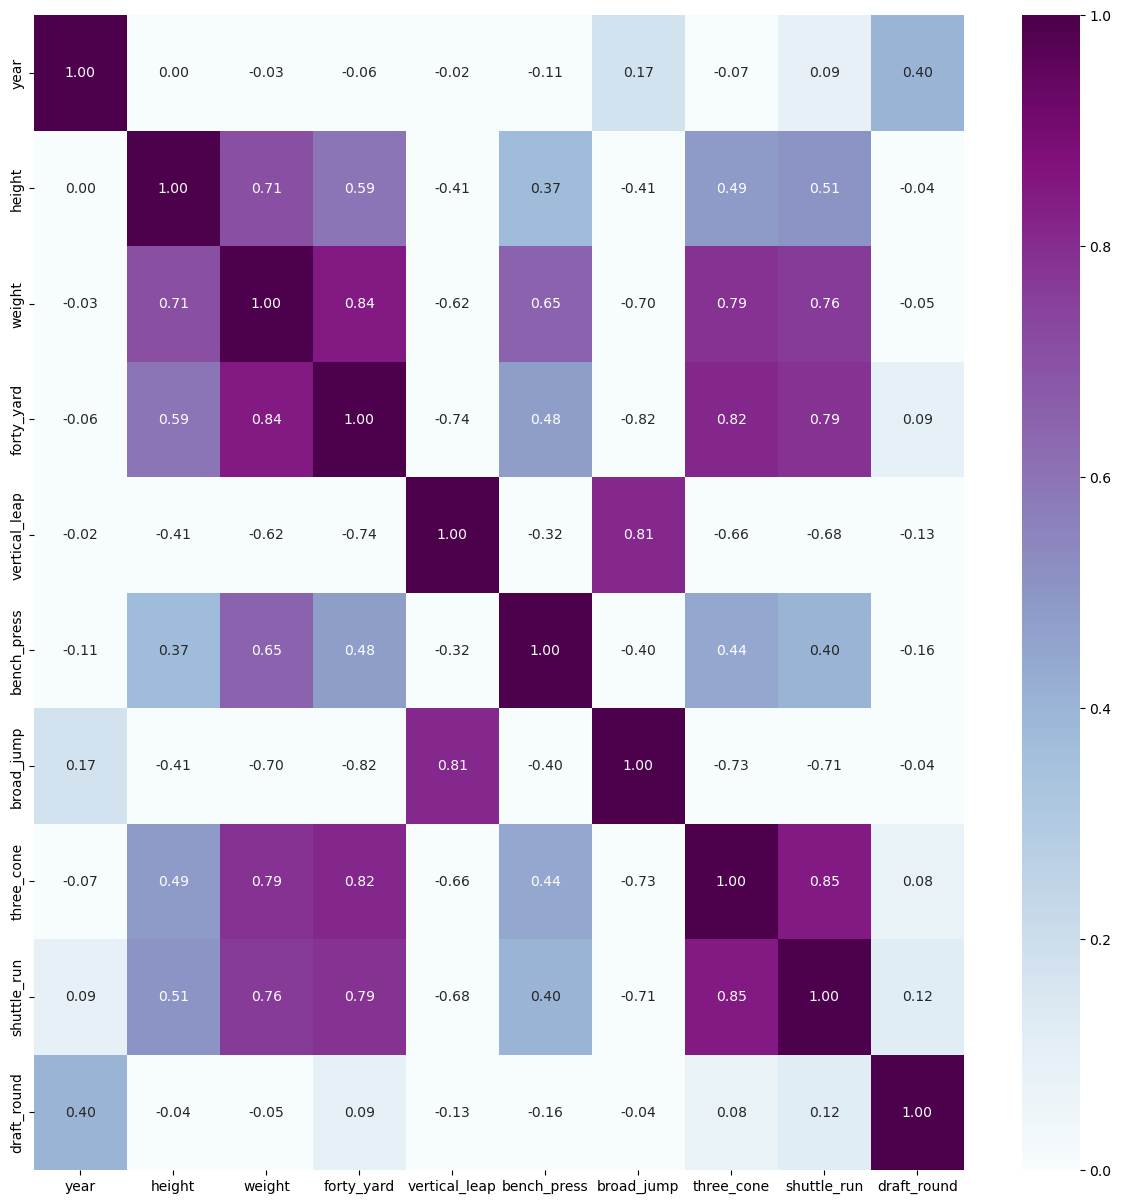

In [13]:
# Correlation Matrix
plt.figure(figsize=(15, 15))

corr_data = raw
corr_data
sns.heatmap(corr_data.corr(), cmap = 'BuPu', annot=True, fmt = '.2f', vmin=0)

# drop weight, drop shuttle run

In [14]:
raw.to_csv('draft_vo3_df.csv', index=False)

In [15]:
# drop weight, drop shuttle run
# final features
drop_cols = ['player_id', 'year', 'School', 'player_name']


In [16]:
# preprocessing 
temp = raw.drop(drop_cols, axis=1)
obj_df = temp.select_dtypes(include = ['object']).copy()
obj_df['position_combine'] = obj_df['position_combine'].astype('category').cat.codes
obj_df['nfl_team'] = obj_df['nfl_team'].astype('category').cat.codes
obj_df['position_nfl_standard'] = obj_df['position_nfl_standard'].astype('category').cat.codes
obj_df.head()

,position_combine,nfl_team,position_nfl_standard
0,14,21,2
1,18,26,11
2,15,15,5
3,20,31,14
4,1,4,1


In [17]:
temp.dtypes

position_combine          object
height                     int64
weight                   float64
forty_yard               float64
vertical_leap            float64
bench_press              float64
broad_jump               float64
three_cone               float64
shuttle_run              float64
nfl_team                  object
position_nfl_standard     object
draft_round              float64
dtype: object

In [18]:
features_df = temp.select_dtypes(include = ['int', 'float']).copy()
obj_df
features_df

df = pd.concat([features_df, obj_df], axis=1)
df.head()


median_imp = df.copy()
df_na = df.copy()

Using *Mice Imputation* To Fill in Data

In [19]:
mk = ImputationKernel(
    data = df,
    save_all_iterations=True
)

In [20]:
mk.mice(2)
mice_imputation = mk.complete_data()
mice_imputation.head()

,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,position_combine,nfl_team,position_nfl_standard
0,76,252.0,4.55,35.0,19.0,119.0,6.75,4.36,1.0,14,21,2
1,72,218.0,4.58,31.5,9.0,123.0,6.87,4.01,1.0,18,26,11
2,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,15,15,5
3,74,253.0,4.97,29.0,14.0,104.0,7.29,4.49,8.0,20,31,14
4,74,206.0,4.55,34.0,18.0,123.0,7.18,4.15,1.0,1,4,1


In [21]:
df = mice_imputation.copy()

In [22]:
X = df.drop('draft_round', axis=1)
y = df['draft_round']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Decision Tree
md = df['draft_round'].nunique()
tree = DecisionTreeClassifier(max_depth=md)

tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)

acc_tree = accuracy_score(pred_tree, y_test)

print(acc_tree)

0.623489932885906


In [24]:
# Naive Bayes
clf_nb = GaussianNB()

#fit model
clf_nb.fit(X_train, y_train)

#predictions
pred_nb = clf_nb.predict(X_test)

#acc score
acc_nb = accuracy_score(pred_nb, y_test)


print(acc_nb)

0.6154362416107383


In [25]:
# KNN
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(pred_knn, y_test)

print(acc_knn)


0.6033557046979866


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(pred_rf, y_test)

print(acc_rf)

0.6174496644295302


Using *Median Imputation* to fill Nans

In [27]:
median_imp.head()

,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,position_combine,nfl_team,position_nfl_standard
0,76,252.0,4.55,NaN,NaN,NaN,NaN,NaN,1.0,14,21,2
1,72,218.0,4.58,NaN,NaN,NaN,NaN,NaN,1.0,18,26,11
2,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,15,15,5
3,74,253.0,4.97,29.0,NaN,104.0,7.29,4.49,8.0,20,31,14
4,74,206.0,4.55,34.0,NaN,123.0,7.18,4.15,1.0,1,4,1


In [28]:
median_val = median_imp.median()
med_df = median_imp.fillna(median_val)
med_df.head()

,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,position_combine,nfl_team,position_nfl_standard
0,76,252.0,4.55,33.0,21.0,116.0,7.19,4.36,1.0,14,21,2
1,72,218.0,4.58,33.0,21.0,116.0,7.19,4.36,1.0,18,26,11
2,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,15,15,5
3,74,253.0,4.97,29.0,21.0,104.0,7.29,4.49,8.0,20,31,14
4,74,206.0,4.55,34.0,21.0,123.0,7.18,4.15,1.0,1,4,1


In [29]:
X = med_df.drop('draft_round', axis=1)
y = med_df['draft_round']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
#Decision tree median
med_md = df['draft_round'].nunique()
med_tree = DecisionTreeClassifier(max_depth=md)
med_tree.fit(X_train, y_train)
med_pred_tree = med_tree.predict(X_test)
med_acc_tree = accuracy_score(med_pred_tree, y_test)
print(med_acc_tree)

0.6302013422818792


In [31]:
# Naive Bayes Median
med_nb = GaussianNB()
med_nb.fit(X_train, y_train)
med_pred_nb = med_nb.predict(X_test)
med_acc_nb = accuracy_score(med_pred_nb, y_test)
print(med_acc_nb)

0.6201342281879194


In [32]:
# KNN Median
knn.fit(X_train, y_train)
med_pred_knn = knn.predict(X_test)
med_acc_knn = accuracy_score(med_pred_knn, y_test)
print(med_acc_knn)

0.6241610738255033


In [33]:
# Random Forest

rf.fit(X_train, y_train)
med_pred_rf = rf.predict(X_test)
pred_acc_rf = accuracy_score(med_pred_rf, y_test)

print(pred_acc_rf)

0.6194630872483221


Seems like the models perform about the same using both methods to fill in data.

Let's see if scaling X will help our models

In [34]:
mice_imputation.head()

,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,position_combine,nfl_team,position_nfl_standard
0,76,252.0,4.55,35.0,19.0,119.0,6.75,4.36,1.0,14,21,2
1,72,218.0,4.58,31.5,9.0,123.0,6.87,4.01,1.0,18,26,11
2,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,15,15,5
3,74,253.0,4.97,29.0,14.0,104.0,7.29,4.49,8.0,20,31,14
4,74,206.0,4.55,34.0,18.0,123.0,7.18,4.15,1.0,1,4,1


In [35]:
scale_df = mice_imputation.copy()

scaler = StandardScaler()

X = scale_df.drop('draft_round', axis=1)
y = df['draft_round']

scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
#Decision tree scaled

scale_tree = DecisionTreeClassifier(max_depth=md)
scale_tree.fit(X_train, y_train)
scale_pred_tree = scale_tree.predict(X_test)
scale_acc_tree = accuracy_score(scale_pred_tree, y_test)
print(scale_acc_tree)

0.6073825503355704


In [37]:
# Naive Bayes Scaled
scale_nb = GaussianNB()
scale_nb.fit(X_train, y_train)
scale_pred_nb = scale_nb.predict(X_test)
scale_acc_nb = accuracy_score(scale_pred_nb, y_test)
print(scale_acc_nb)

0.6080536912751678


In [38]:
# KNN Median Scale
knn.fit(X_train, y_train)
scale_pred_knn = knn.predict(X_test)
scale_acc_knn = accuracy_score(scale_pred_knn, y_test)
print(scale_acc_knn)

0.5993288590604027


In [39]:
# Random Forest Scale

rf.fit(X_train, y_train)
scale_pred_rf = rf.predict(X_test)
scale_acc_rf = accuracy_score(scale_pred_rf, y_test)

print(scale_acc_rf)

0.6241610738255033


Still about the same ...
Let's drop all Nans. This will normalize the data, but exclude a large chunck of our data and pretty much unusable since it's not realistic

In [50]:
df_na = pd.read_csv('draft_df.csv')
df_na.head()

,player_id,year,player_name,position_combine,School,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,nfl_team,position_nfl,position_nfl_standard,draft_round,draft_pick
0,2000DarnAlfo,2000,Darnell Alford,OT,Boston Col.,6 ft 4 in,334.0,5.56,25.0,23.0,94.0,8.48,4.98,KAN,G,G,6.0,188.0
1,2000ReggAust,2000,Reggie Austin,CB,Wake Forest,5 ft 9 in,175.0,4.44,35.0,17.0,119.0,7.03,4.14,CHI,DB,DB,4.0,125.0
2,2000MarkBani,2000,Mark Baniewicz,OT,Syracuse,6 ft 6 in,312.0,5.34,28.0,20.0,96.0,7.72,4.73,JAX,T,T,7.0,247.0
3,2000RashBarn,2000,Rashidi Barnes,S,Colorado,6 ft 0 in,208.0,4.62,35.0,10.0,114.0,6.92,4.32,CLE,DB,DB,7.0,225.0
4,2000DaviBarr,2000,David Barrett,CB,Arkansas,5 ft 10 in,199.0,4.44,37.5,16.0,116.0,6.81,4.04,ARI,DB,DB,4.0,102.0


In [51]:
#convert height to inches
str_height = df_na['height']
def inches(string):
    split_list = re.split(r'\s+', string)
    feet = pd.to_numeric(split_list[0])
    inches = pd.to_numeric(split_list[2])
    total = feet*12 + inches
    return total
    
inches_height = [inches(h) for h in str_height]
inches_height

df_na['height'] = inches_height

In [52]:
#preprocessing
drop_cols = ['player_id', 'year', 'School', 'player_name', 'position_nfl']
temp = df_na.drop(drop_cols, axis=1)
obj_df = temp.select_dtypes(include = ['object']).copy()
obj_df['position_combine'] = obj_df['position_combine'].astype('category').cat.codes
obj_df['nfl_team'] = obj_df['nfl_team'].astype('category').cat.codes
obj_df['position_nfl_standard'] = obj_df['position_nfl_standard'].astype('category').cat.codes
obj_df.head()

,position_combine,nfl_team,position_nfl_standard
0,9,15,5
1,1,5,1
2,9,14,9
3,12,7,1
4,1,0,1


In [53]:
features_df = temp.select_dtypes(include = ['int', 'float']).copy()
obj_df
features_df

df_na = pd.concat([features_df, obj_df], axis=1)

In [61]:
# drop all nans and drop all 'draft_round = 8'
df_na.dropna(inplace=True)
df_na = df_na[df_na['draft_round']!=8]
df_na.head()

,height,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,draft_pick,position_combine,nfl_team,position_nfl_standard
0,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,188.0,9,15,5
1,69,175.0,4.44,35.0,17.0,119.0,7.03,4.14,4.0,125.0,1,5,1
2,78,312.0,5.34,28.0,20.0,96.0,7.72,4.73,7.0,247.0,9,14,9
3,72,208.0,4.62,35.0,10.0,114.0,6.92,4.32,7.0,225.0,12,7,1
4,70,199.0,4.44,37.5,16.0,116.0,6.81,4.04,4.0,102.0,1,0,1


In [55]:
len(df_na)

1667

In [56]:
scaler = StandardScaler()

X = df_na.drop('draft_round', axis=1)
y = df_na['draft_round']

scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
#Decision tree drop nans
md = y.nunique()
na_tree = DecisionTreeClassifier(max_depth=md)
na_tree.fit(X_train, y_train)
na_pred_tree = na_tree.predict(X_test)
na_acc_tree = accuracy_score(na_pred_tree, y_test)
print(na_acc_tree)

0.9221556886227545


In [58]:
# Naive Bayes drop nans
na_nb = GaussianNB()
na_nb.fit(X_train, y_train)
na_pred_nb = na_nb.predict(X_test)
na_acc_nb = accuracy_score(na_pred_nb, y_test)
print(na_acc_nb)

0.9041916167664671


In [59]:
# KNN Drop Nans
knn.fit(X_train, y_train)
na_pred_knn = knn.predict(X_test)
na_acc_knn = accuracy_score(na_pred_knn, y_test)
print(na_acc_knn)

0.8772455089820359


In [62]:
# Random Forest drop Nans

rf.fit(X_train, y_train)
na_pred_rf = rf.predict(X_test)
na_acc_rf = accuracy_score(na_pred_rf, y_test)

print(na_acc_rf)

pred_df = pd.DataFrame({
    'predicted': na_pred_rf,
    'actual': y_test
})



0.9341317365269461


,predicted,actual
284,3.0,3.0
69,4.0,4.0
1137,2.0,2.0
385,1.0,1.0
210,7.0,7.0
...,...,...
1018,6.0,6.0
585,4.0,5.0
433,3.0,3.0
733,1.0,1.0
